In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

# import matplotlib
# matplotlib.use('nbagg')

%matplotlib inline
# %pylab inline

## Load data

In [3]:
raw_df = pd.read_csv("/Users/juhe/annie/analysis/FullMRDGeometry_09_29_20.csv", skiprows=6, header=0, sep=',')

raw_df.head(3)

,detector_num,channel_num,detector_system,orientation,layer,side,num,x_center,y_center,z_center,...,amp_channel,hv_crate,hv_slot,hv_channel,nominal_HV,polarity,PMT_type,cable_label,paddle_label,notes
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-198.699875,5.08,...,-1.0,2.0,14.0,0.0,-1871.0,-1.0,EMI9815,MRD_x00_y00_z00,4SW,None
1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-167.999875,5.08,...,-1.0,2.0,14.0,1.0,-1838.0,-1.0,EMI9815,MRD_x00_y01_z00,U39,None
2,2,2.0,0.0,0.0,0.0,0.0,2.0,0.0,-137.299875,5.08,...,-1.0,2.0,14.0,2.0,-1793.0,-1.0,EMI9815,MRD_x00_y02_z00,U58 (or U38; bad writing),None


In [3]:
raw_df.columns

Index(['detector_num', 'channel_num', 'detector_system', 'orientation',
       'layer', 'side', 'num', 'x_center', 'y_center', 'z_center', 'x_width',
       'y_width', 'z_width', 'rack', 'TDC_slot', 'TDC_channel', 'discrim_slot',
       'discrim_ch', 'patch_panel_row', 'patch_panel_col', 'amp_slot',
       'amp_channel', 'hv_crate', 'hv_slot', 'hv_channel', 'nominal_HV',
       'polarity', 'PMT_type', 'cable_label', 'paddle_label', 'notes'],
      dtype='object')

In [4]:
mrd_df = raw_df[raw_df['detector_system'] == 1]
print("num mrd pmts: " + str(len(mrd_df)))

mrd_df.head(3)

num mrd pmts: 306


,detector_num,channel_num,detector_system,orientation,layer,side,num,x_center,y_center,z_center,...,amp_channel,hv_crate,hv_slot,hv_channel,nominal_HV,polarity,PMT_type,cable_label,paddle_label,notes
26,26,26.0,1.0,0.0,2.0,0.0,0.0,-73.75,-121.8,336.38,...,-1.0,1.0,4.0,0.0,-2100.0,-1.0,-9999,MRD_x00_y00_z02,MRD_x00_y00_z02,None
27,27,27.0,1.0,0.0,2.0,0.0,1.0,-73.75,-101.5,336.38,...,-1.0,1.0,4.0,1.0,-2100.0,-1.0,-9999,MRD_x00_y01_z02,MRD_x00_y01_z02,None
28,28,28.0,1.0,0.0,2.0,0.0,2.0,-73.75,-81.2,336.38,...,-1.0,1.0,4.0,2.0,-2100.0,-1.0,-9999,MRD_x00_y02_z02,MRD_x00_y02_z02,None


In [5]:
fmv_df = raw_df[raw_df['detector_system'] == 0]
print("num fmv pmts: " + str(len(fmv_df)))

fmv_df.head(3)

num fmv pmts: 26


,detector_num,channel_num,detector_system,orientation,layer,side,num,x_center,y_center,z_center,...,amp_channel,hv_crate,hv_slot,hv_channel,nominal_HV,polarity,PMT_type,cable_label,paddle_label,notes
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-198.699875,5.08,...,-1.0,2.0,14.0,0.0,-1871.0,-1.0,EMI9815,MRD_x00_y00_z00,4SW,None
1,1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,-167.999875,5.08,...,-1.0,2.0,14.0,1.0,-1838.0,-1.0,EMI9815,MRD_x00_y01_z00,U39,None
2,2,2.0,0.0,0.0,0.0,0.0,2.0,0.0,-137.299875,5.08,...,-1.0,2.0,14.0,2.0,-1793.0,-1.0,EMI9815,MRD_x00_y02_z00,U58 (or U38; bad writing),None


## Plot PMT positions

In [6]:
# l_pmts_hit_x = [mrd_df[mrd_df]]
pmts_hit_df = mrd_df[mrd_df.channel_num.isin([242., 186., 134., 71., 72., 73., 16., 17., 220., 162., 108., 46.])]    #18 is in fmv_df
fmv_df[fmv_df.channel_num.isin([71.,18.,150.,94.,38.])]

,detector_num,channel_num,detector_system,orientation,layer,side,num,x_center,y_center,z_center,...,amp_channel,hv_crate,hv_slot,hv_channel,nominal_HV,polarity,PMT_type,cable_label,paddle_label,notes
18,18,18.0,0.0,0.0,0.0,1.0,5.0,0.0,-44.564875,7.28,...,-1.0,2.0,15.0,5.0,-1786.0,-1.0,EMI9815,MRD_x01_y05_z010,U36,None


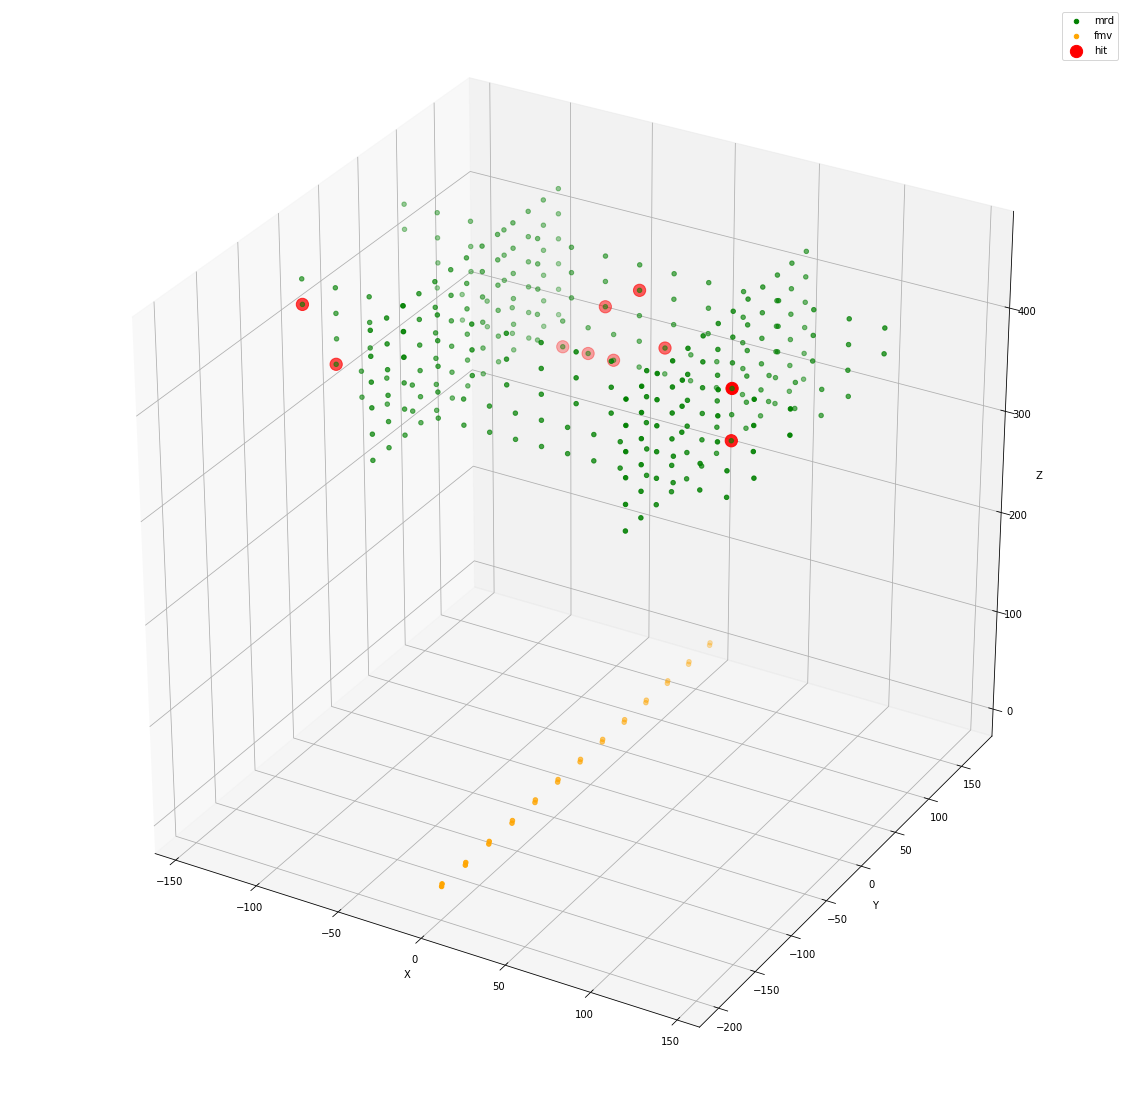

In [7]:
fig, ax = plt.subplots()
ax = plt.axes(projection = '3d')

fig.set_size_inches(20,20)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

ax.scatter(mrd_df['x_center'], mrd_df['y_center'], mrd_df['z_center'], label='mrd', color='green')
ax.scatter(fmv_df['x_center'], fmv_df['y_center'], fmv_df['z_center'], label='fmv', color='orange')
ax.scatter(pmts_hit_df['x_center'], pmts_hit_df['y_center'], pmts_hit_df['z_center'], label='hit', color='red', s=150)

ax.legend()
plt.show()

## Check distances between MRD PMTs

In [8]:
mrd_df['z_center'].unique()

array([336.38, 348.84, 361.3 , 373.76, 386.22, 398.33, 410.44, 422.55,
       434.66, 446.77, 458.88])

In [10]:
l_zctr = list(mrd_df['z_center'].unique())

i=0
while i < len(l_zctr)-1:
    z_diff = l_zctr[i+1] - l_zctr[i]
    print("diff: " + str(z_diff))
    i+=1

diff: 12.45999999999998
diff: 12.460000000000036
diff: 12.45999999999998
diff: 12.460000000000036
diff: 12.109999999999957
diff: 12.110000000000014
diff: 12.110000000000014
diff: 12.110000000000014
diff: 12.109999999999957
diff: 12.110000000000014


In [11]:
mrd_df['y_center'].unique()

array([-121.8 , -101.5 ,  -81.2 ,  -60.9 ,  -40.6 ,  -20.3 ,    0.  ,
         20.3 ,   40.6 ,   60.9 ,   81.2 ,  101.5 ,  121.8 ,  -65.25,
         65.25])

In [12]:
l_yctr = list(mrd_df['y_center'].unique())

i=0
while i < len(l_yctr)-1:
    y_diff = l_yctr[i+1] - l_yctr[i]
    print("diff: " + str(y_diff))
    i+=1

diff: 20.299999999999997
diff: 20.299999999999997
diff: 20.300000000000004
diff: 20.299999999999997
diff: 20.3
diff: 20.3
diff: 20.3
diff: 20.3
diff: 20.299999999999997
diff: 20.300000000000004
diff: 20.299999999999997
diff: 20.299999999999997
diff: -187.05
diff: 130.5


In [13]:
mrd_df['x_center'].unique()

array([ -73.75,   73.75, -107.1 ,  -91.8 ,  -76.5 ,  -61.2 ,  -45.9 ,
        -30.6 ,  -15.3 ,    0.  ,   15.3 ,   30.6 ,   45.9 ,   61.2 ,
         76.5 ,   91.8 ,  107.1 , -122.4 ,  122.4 , -121.8 , -101.5 ,
        -81.2 ,  -60.9 ,  -40.6 ,  -20.3 ,   20.3 ,   40.6 ,   60.9 ,
         81.2 ,  101.5 ,  121.8 , -142.1 ,  142.1 ])

In [14]:
l_xctr = list(mrd_df['x_center'].unique())

i=0
while i < len(l_xctr)-1:
    x_diff = l_xctr[i+1] - l_xctr[i]
    print("diff: " + str(x_diff))
    i+=1

diff: 147.5
diff: -180.85
diff: 15.299999999999997
diff: 15.299999999999997
diff: 15.299999999999997
diff: 15.300000000000004
diff: 15.299999999999997
diff: 15.3
diff: 15.3
diff: 15.3
diff: 15.3
diff: 15.299999999999997
diff: 15.300000000000004
diff: 15.299999999999997
diff: 15.299999999999997
diff: 15.299999999999997
diff: -229.5
diff: 244.8
diff: -244.2
diff: 20.299999999999997
diff: 20.299999999999997
diff: 20.300000000000004
diff: 20.299999999999997
diff: 20.3
diff: 40.6
diff: 20.3
diff: 20.299999999999997
diff: 20.300000000000004
diff: 20.299999999999997
diff: 20.299999999999997
diff: -263.9
diff: 284.2


In [19]:
# mrd_df[mrd_df['channel_num'] == 50]
mrd_df['x_center'][mrd_df['detector_num'] == '50'].iloc[0]

73.75

## Connect the dots

In [25]:
mrd_pmts_hit = [50,70,110,130,164,184,218,240]

conn_dots_mrd_track = 0.

i = 1
while i < len(mrd_pmts_hit):
    detkey1 = mrd_pmts_hit[i-1]
    detkey2 = mrd_pmts_hit[i]
    print(detkey1, detkey2)
    
    x2 = mrd_df[mrd_df['channel_num'] == detkey2]['x_center'].iloc[0]
    x1 = mrd_df[mrd_df['channel_num'] == detkey1]['x_center'].iloc[0]
    y2 = mrd_df[mrd_df['channel_num'] == detkey2]['y_center'].iloc[0]
    y1 = mrd_df[mrd_df['channel_num'] == detkey1]['y_center'].iloc[0]
    z2 = mrd_df[mrd_df['channel_num'] == detkey2]['z_center'].iloc[0]
    z1 = mrd_df[mrd_df['channel_num'] == detkey1]['z_center'].iloc[0]
    
    dist = np.sqrt((x2-x1)**2 + (y2-y1)**2 + (z2-z1)**2)
    
    conn_dots_mrd_track += dist
    print("dist: " + str(dist))
    print("conn_dots_mrd_track: " + str(conn_dots_mrd_track))
    i+=1

50 70
dist: 140.28833379864486
conn_dots_mrd_track: 140.28833379864486
70 110
dist: 136.3364089302634
conn_dots_mrd_track: 276.62474272890825
110 130
dist: 138.33676300969313
conn_dots_mrd_track: 414.9615057386014
130 164
dist: 120.37564786949228
conn_dots_mrd_track: 535.3371536080937
164 184
dist: 135.26343593151847
conn_dots_mrd_track: 670.6005895396122
184 218
dist: 139.96905765203965
conn_dots_mrd_track: 810.5696471916518
218 240
dist: 120.56797709176347
conn_dots_mrd_track: 931.1376242834153
